In [9]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_excel("/content/AirQualityUCI.xlsx")

# Replace missing values (-200) with NaN
df.replace(-200, np.nan, inplace=True)

# Drop unnecessary columns
df.drop(columns=["Date", "Time"], inplace=True, errors="ignore")

# Fill missing values using mean
imputer = SimpleImputer(strategy="mean")
df.iloc[:, :] = imputer.fit_transform(df)

# Select Features (X) and Target Variable (y)
X = df.drop(columns=["CO(GT)"])  # Change this to the correct target variable
y = df["CO(GT)"]  # Target variable (pollution level)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor

# Define the kernel: Constant * RBF + WhiteKernel (Noise)
kernel = ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

# Train Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)
gpr.fit(X_train, y_train)

# Print the learned kernel parameters
print("Optimized Kernel Parameters:", gpr.kernel_)

Optimized Kernel Parameters: 2.53**2 * RBF(length_scale=2.25) + WhiteKernel(noise_level=0.195)


In [12]:
# Predict test set results
y_pred, std_dev = gpr.predict(X_test, return_std=True)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")

RMSE: 0.4804386616041473
MAE: 0.31674474739341535
R² Score: 0.8756728179355001


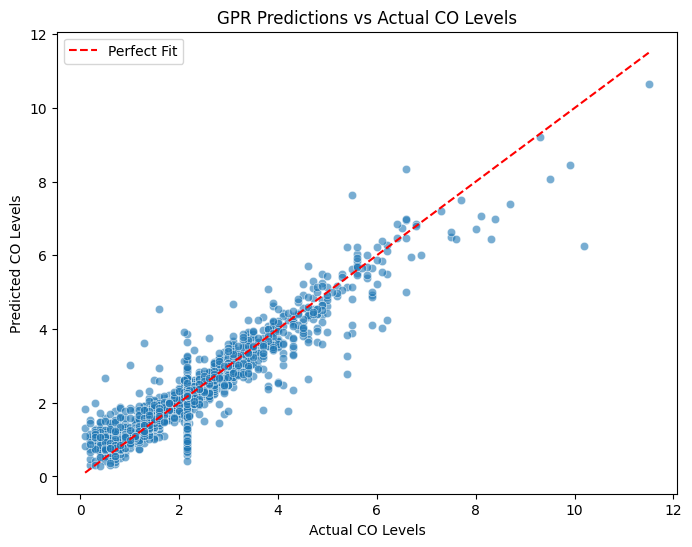

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Fit')
plt.xlabel("Actual CO Levels")
plt.ylabel("Predicted CO Levels")
plt.title("GPR Predictions vs Actual CO Levels")
plt.legend()
plt.show()

In [15]:
import joblib

# Save model
joblib.dump(gpr, "gpr_air_quality_model.pkl")

['gpr_air_quality_model.pkl']